##Importing the libraries and data

In [100]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [102]:
df= pd.read_csv("https://raw.githubusercontent.com/Pravallika-Myneni/health-bill-estimator/main/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory data Analysis

In [103]:
df.shape

(1338, 7)

In [104]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [105]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [106]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

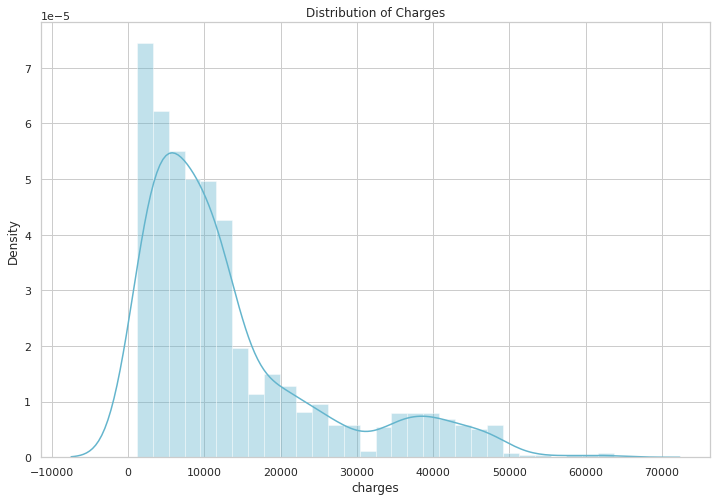

In [107]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


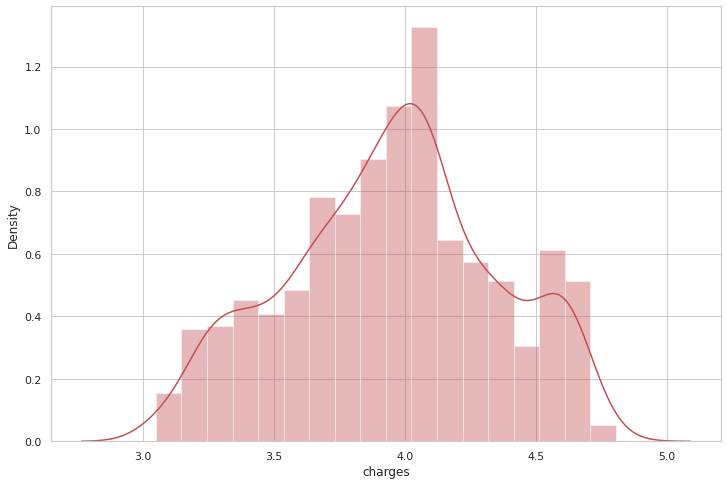

In [108]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


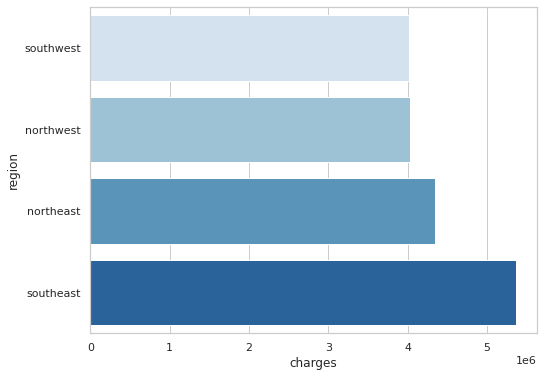

In [109]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

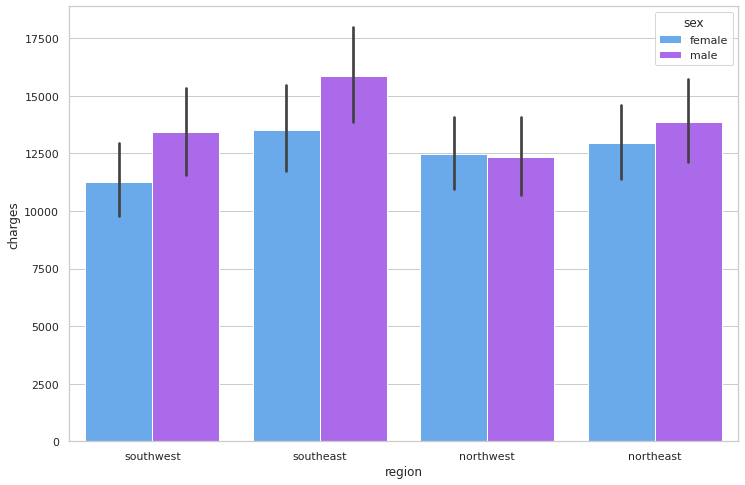

In [110]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

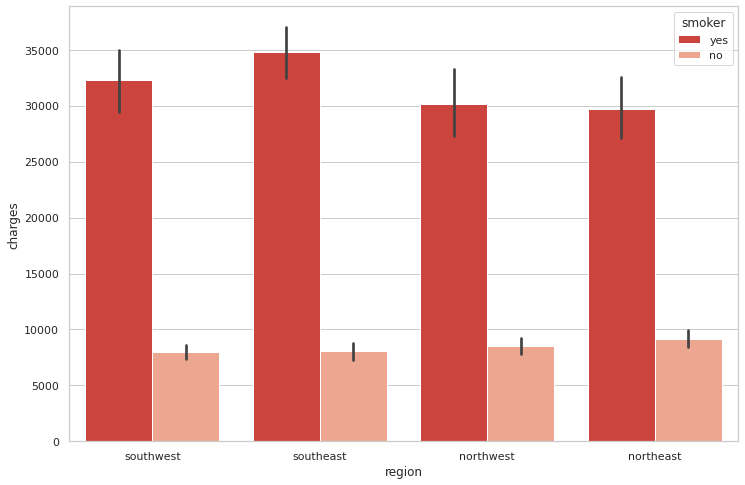

In [111]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

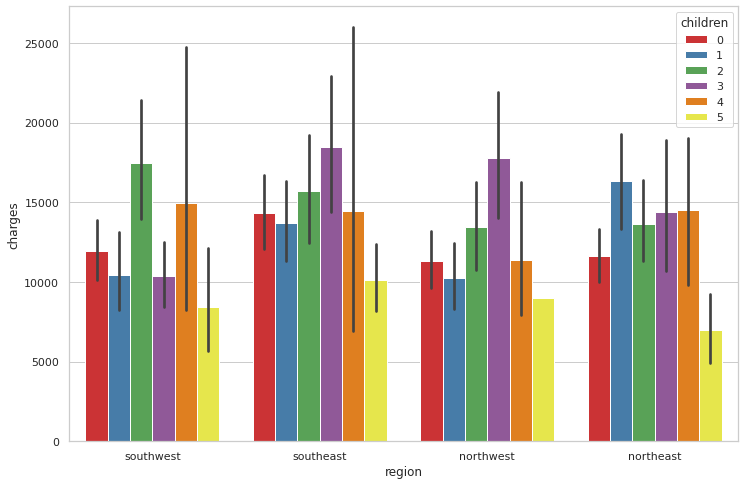

In [112]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

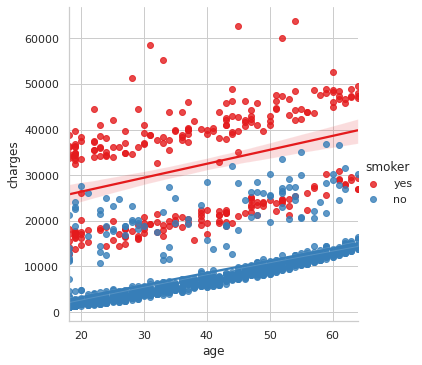

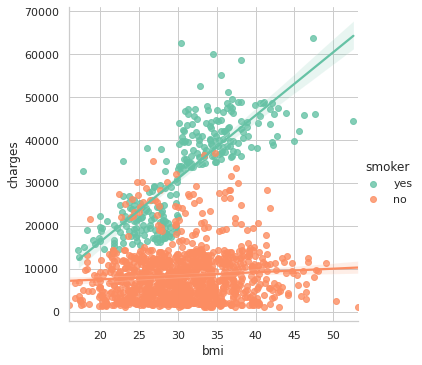

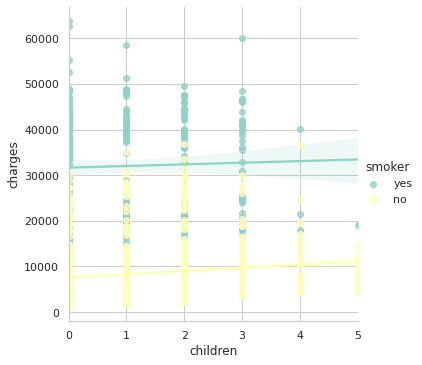

In [113]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

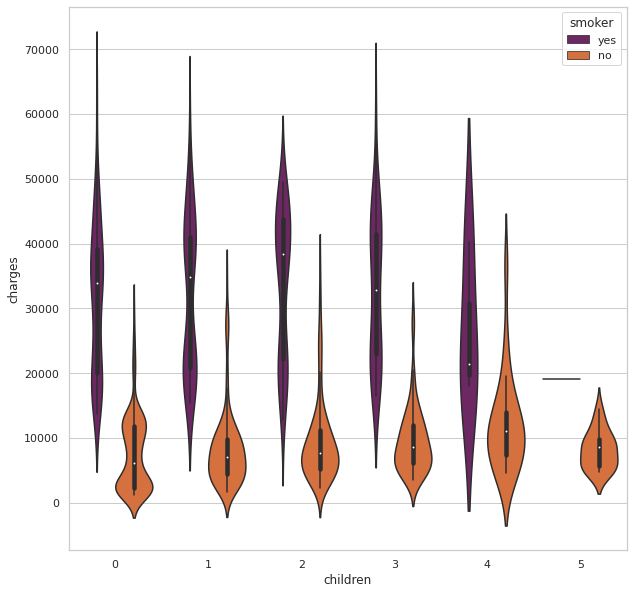

In [114]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

### Encoding Categorical Variables
sex: female --> 1, male -->0
smoker: yes-->1 no-->0
region: northeast--> 3 northwest -->2 southeast -->1 southwest --> 0 

In [134]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='female' else (0 if x=='male' else None))
df['smoker'] = df['smoker'].apply(lambda x: 1 if x=='yes' else (0 if x=='no' else None))
df['region'] = df['region'].apply(lambda x: 3 if x=='northeast' else ( 2 if x== 'northwest' else (1 if x== 'southeast' else (0 if x=='southwest' else None))))

### Finding the correlation between the columns

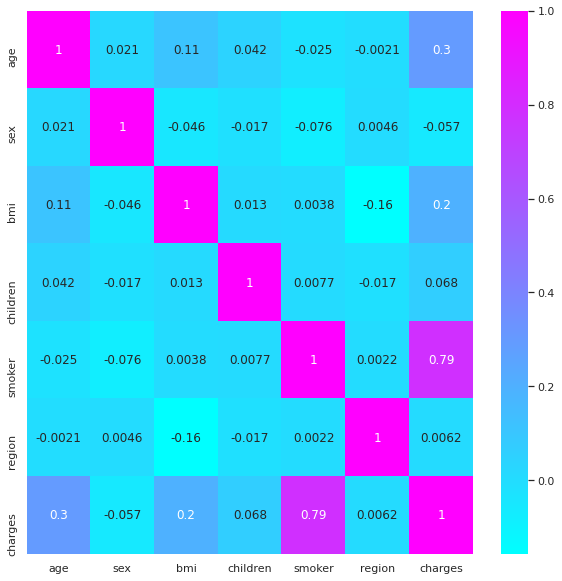

In [116]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
corr_h =df.corr()
ax = sns.heatmap(corr_h, annot=True, cmap='cool')


In [117]:
corr_h['charges'].sort_values()

sex        -0.057292
region      0.006208
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

As we can see the charges column is highly dependent on smoker column

The column sex is negatively correlated with charges

In [129]:
df_1 = df.copy()
x = df_1.drop(['charges', 'region','sex','children'], axis = 1)
y = df_1['charges']

Splitting the data into test and train data sets 

In [130]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Developing a linear regression model

In [131]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()
Lin_reg.fit(x, y)
print(Lin_reg.score(x_test, y_test))

0.7951614010360556


## Getting Data from user

Getting data from user and preprocessing the data

In [121]:
user_input_age = input("Enter age: ")
user_input_gender = input("Enter gender: ").lower()
user_input_bmi = input("Enter BMI: ")
user_input_children = input("Enter No of children: ")
user_input_smoker = input("Enter No of smoker: ").lower()
user_input_region = input("Enter region of the hospital location: ").lower()

Enter age: 19
Enter gender: female
Enter BMI: 29
Enter No of children: 2
Enter No of smoker: no
Enter region of the hospital location: northeast


In [122]:
user_input = {'age' : [user_input_age], 'sex' : [user_input_gender] , 'bmi' : [user_input_bmi] , 'children' : [user_input_children] ,'smoker': [user_input_smoker],'region': [user_input_region] }

In [123]:
user_input_df = pd.DataFrame(user_input)
copy_df= pd.DataFrame(user_input)
user_input_df


,age,sex,bmi,children,smoker,region
0,19,female,29,2,no,northeast


In [124]:
user_input_df['sex'] = user_input_df['sex'].apply(lambda x: 1 if x=='female' else 0)
user_input_df['smoker'] = user_input_df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
user_input_df['region'] = user_input_df['region'].apply(lambda x: 3 if x=='northeast' else ( 2 if x== 'northwest' else (1 if x== 'southeast' else 0)))
user_ip = user_input_df.drop(columns= ['sex','region','children'])
user_input_df

,age,sex,bmi,children,smoker,region
0,19,1,29,2,0,3


Applying linear Regression on the user input

In [125]:
answer_lr = Lin_reg.predict(user_ip)
answer_lr

array([2610.41076605])

Developing a Ridge regression model

In [126]:
from sklearn.linear_model import Ridge
rdg  = Ridge(alpha = 1.0)
rdg.fit(x,y)
answer_rdg = rdg.predict(user_ip)
answer_rdg

array([2634.28705311])

### Extracting the actual medical bill and appending the user input to the data 


In [127]:
user_actual_ouput = input("Enter actual output: ")
user_input_df_2 = user_input_df.copy()
user_input_df_2['charges'] = user_actual_ouput

Enter actual output: 4444


In [133]:
df.append(user_input_df_2,ignore_index=True)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,1,0,16884.9
1,18,0,33.77,1,0,1,1725.55
2,28,0,33,3,0,1,4449.46
3,33,0,22.705,0,0,2,21984.5
4,32,0,28.88,0,0,2,3866.86
...,...,...,...,...,...,...,...
1334,18,1,31.92,0,0,3,2205.98
1335,18,1,36.85,0,0,1,1629.83
1336,21,1,25.8,0,0,0,2007.94
1337,61,1,29.07,0,1,2,29141.4
